# Web Traffic Analysis Project: Google Analytics Data

Project Objective: This project aims to analyze website traffic using a public dataset from Google Analytics, focusing on sessions, unique users, and session duration over time. Through this analysis, we can understand user engagement, traffic trends, and how these metrics evolve. This report will include graphs, statistical analysis, and potential correlations, as well as recommendations for improving web traffic performance.

## 1. Data Loading
First, we will load the dataset into a Pandas DataFrame.

In [20]:
import pandas as pd

# Load the dataset from the CSV file
data = pd.read_csv('./website_wata.csv')

# Display the first few rows of the dataset
data.head()


,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


## 2. Data Exploration
Next, we will perform some basic exploration of the dataset to understand its structure.

In [21]:
# Check the shape of the dataset
print("Total Records:", data.shape[0])
print("Total Features:", data.shape[1])

# Display the summary of the dataset
data.info()

# Display basic statistics
data.describe()



Total Records: 2000
Total Features: 7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

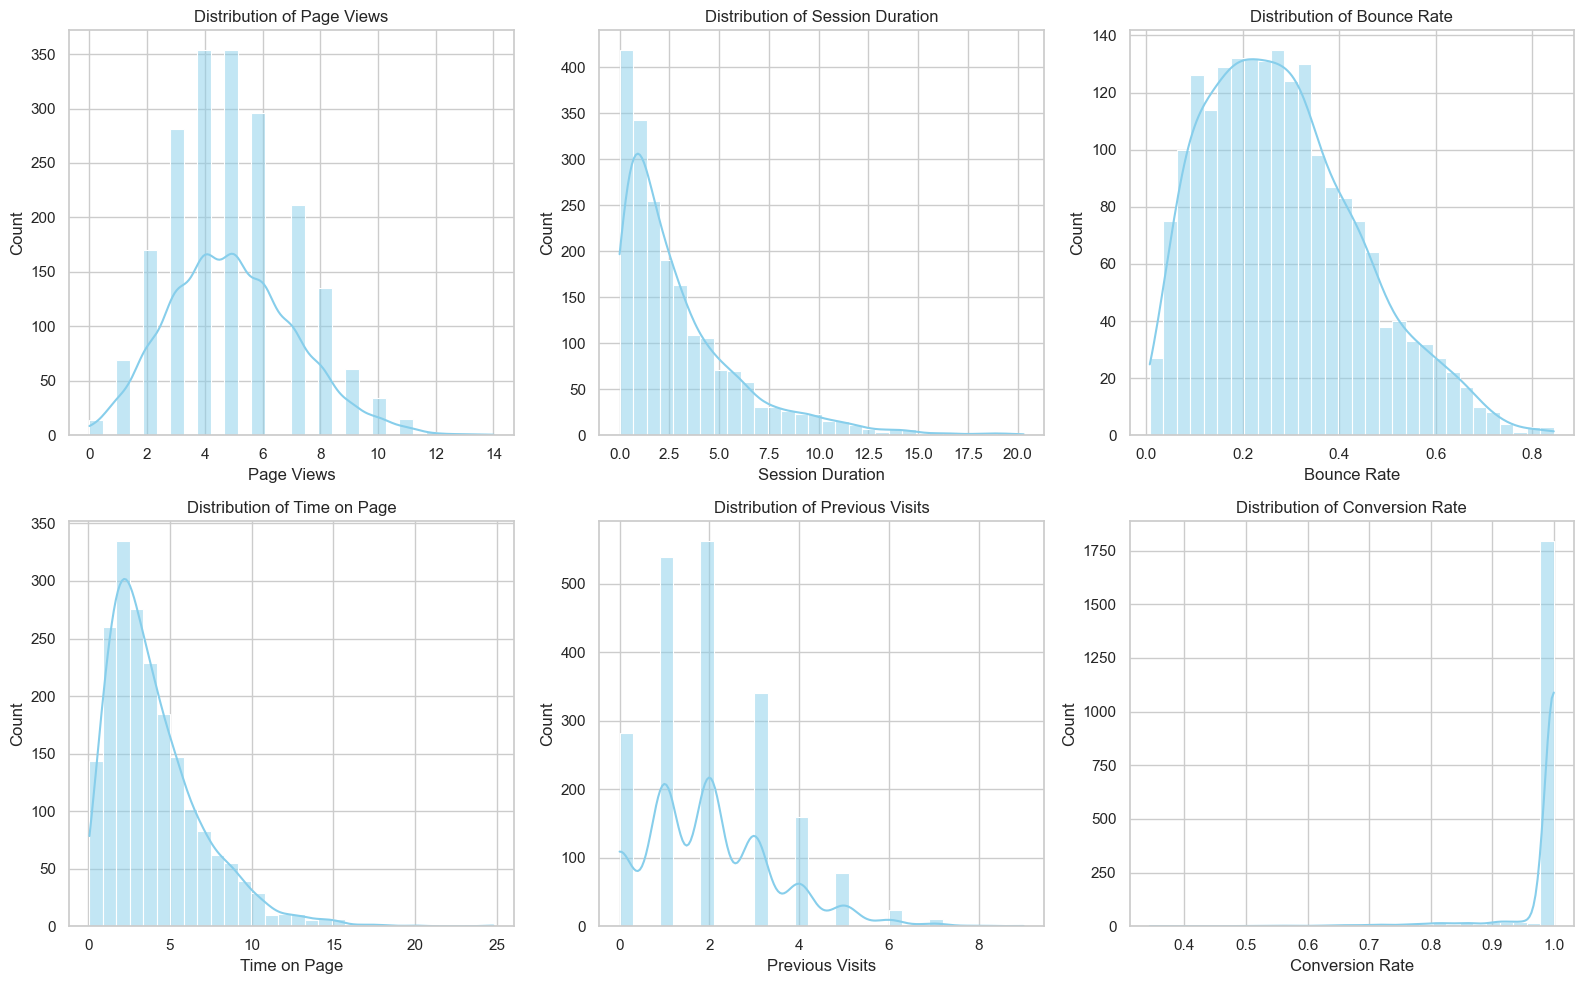

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style for the plots
sns.set(style="whitegrid")

# 1. Distribution of numerical features
plt.figure(figsize=(16, 10))
for i, column in enumerate(['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

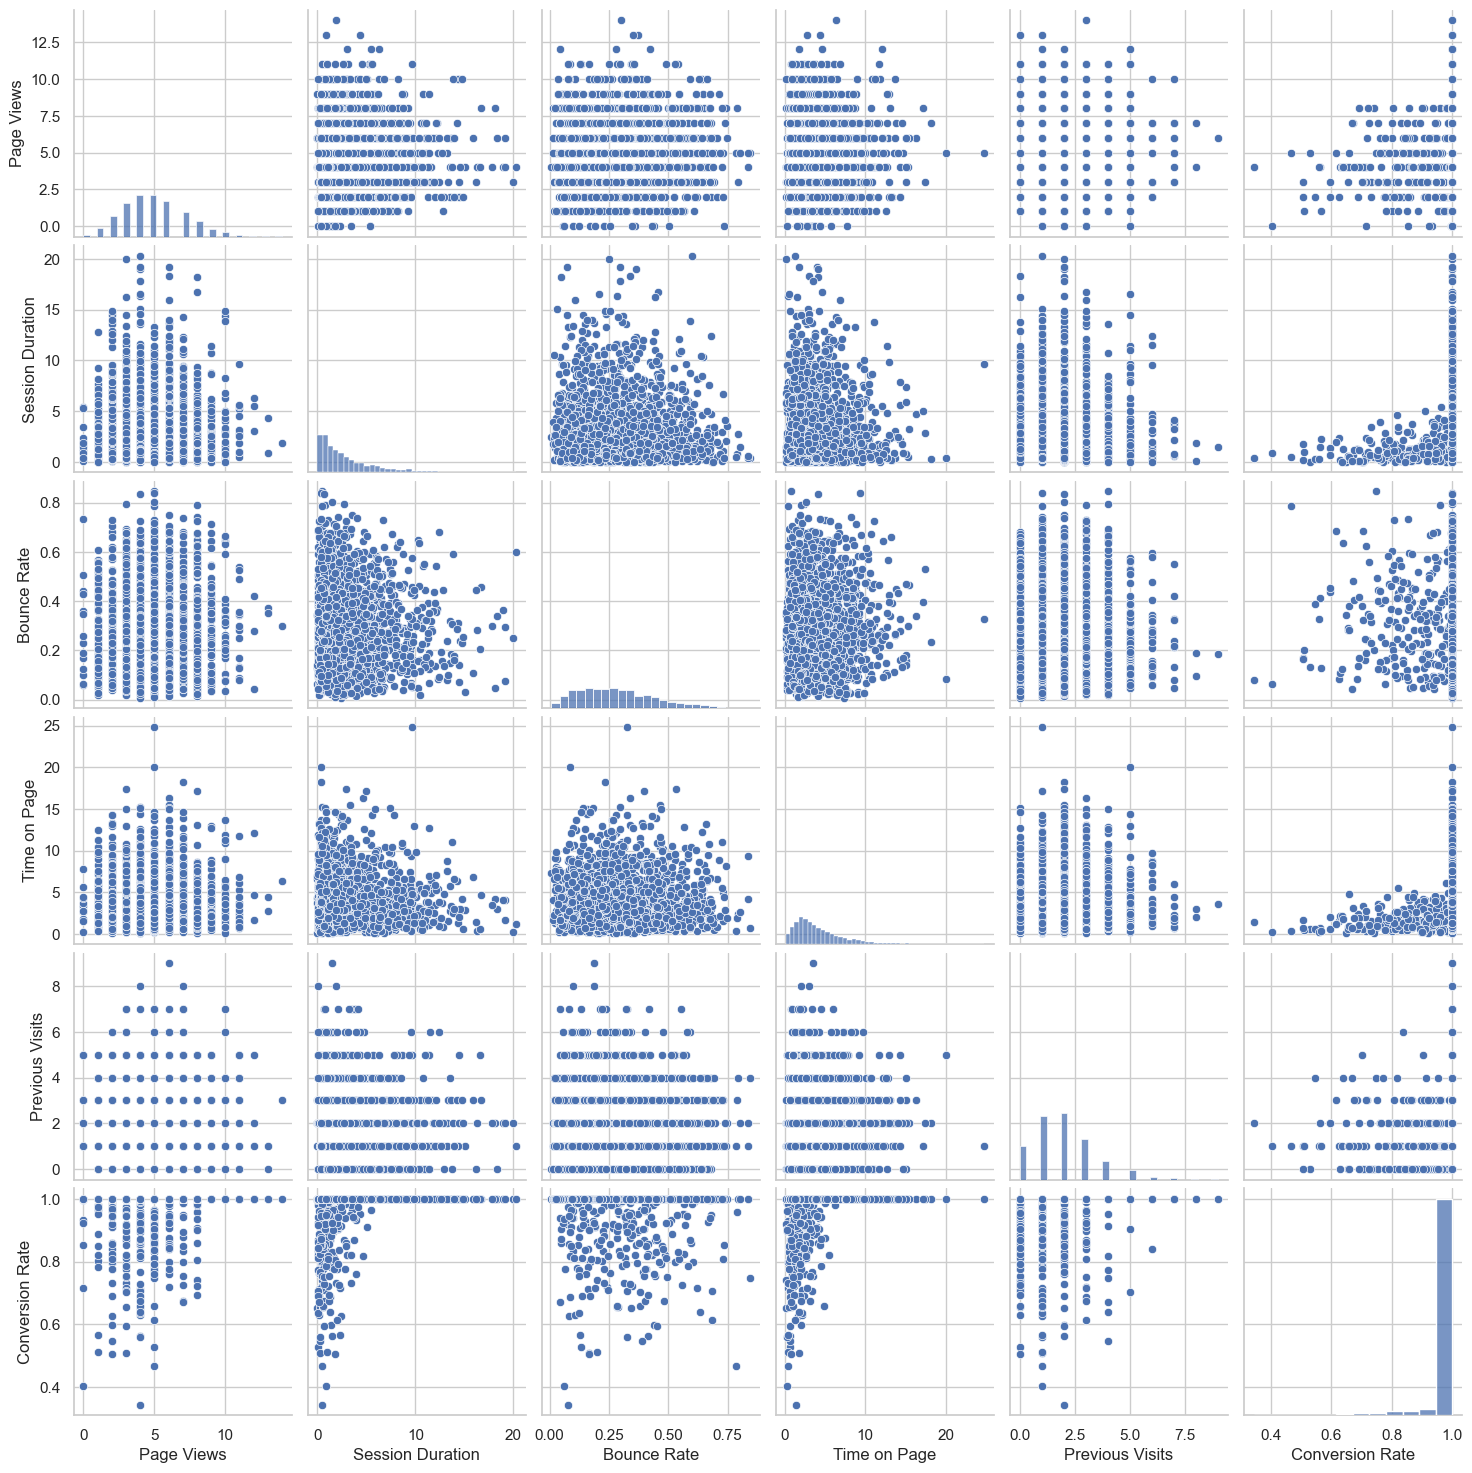

In [32]:
# 3. Pairplot to visualize pairwise relationships
sns.pairplot(data[['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate']])
plt.show()

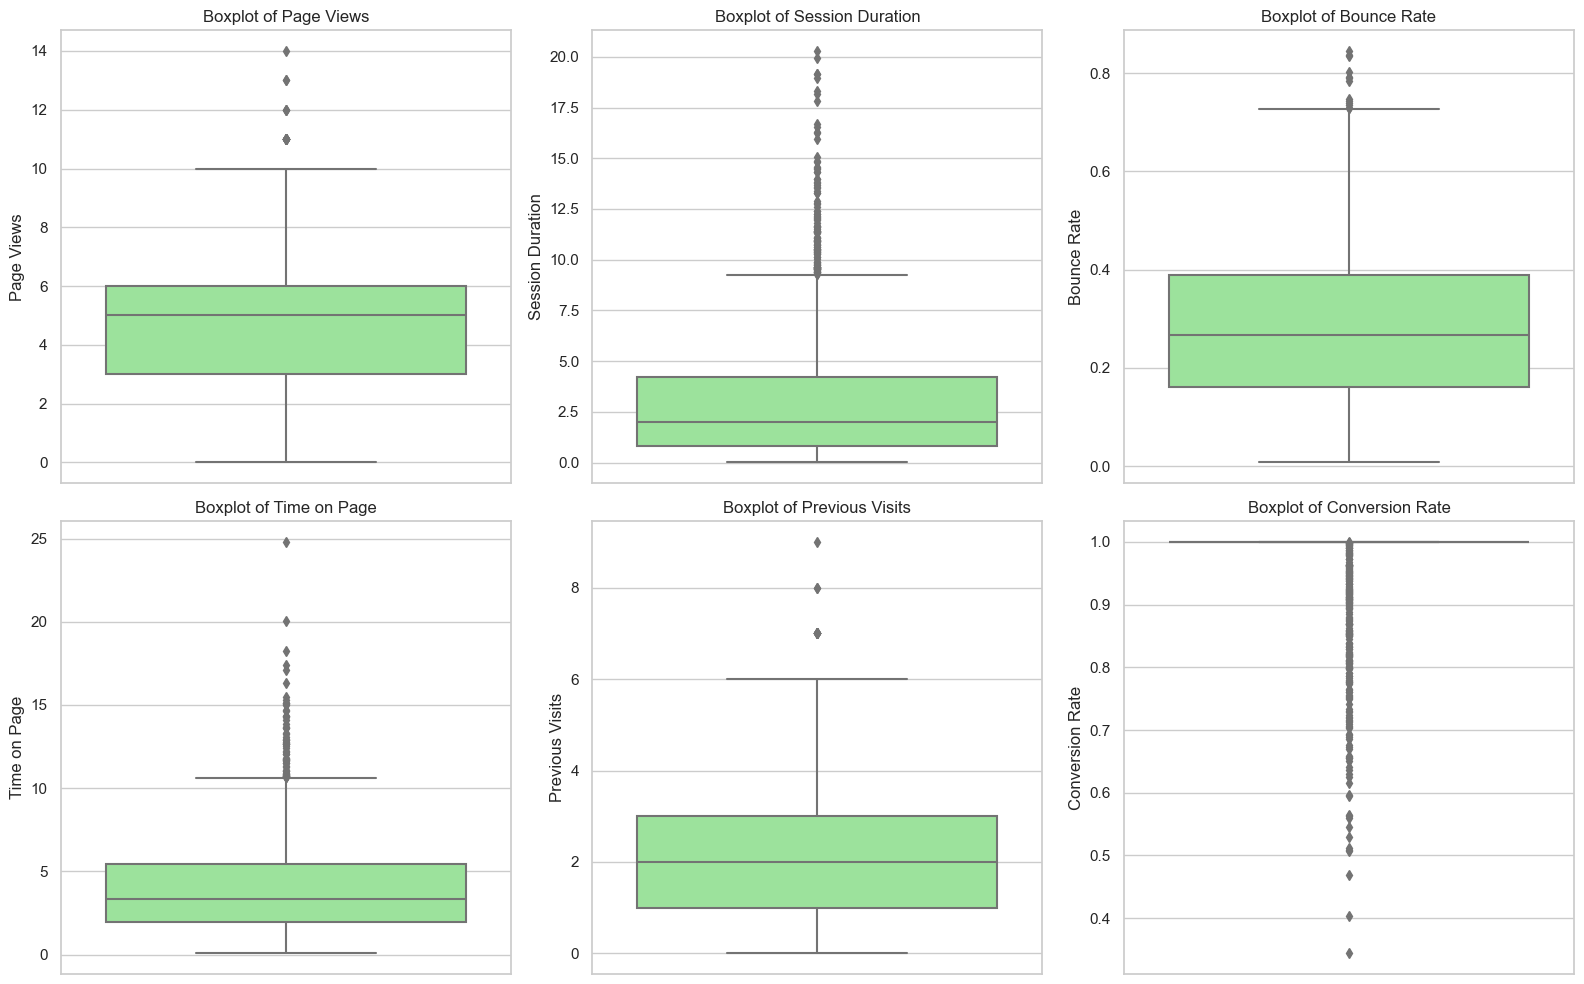

In [33]:
# 4. Boxplots for identifying outliers
plt.figure(figsize=(16, 10))
for i, column in enumerate(['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[column], color="lightgreen")
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

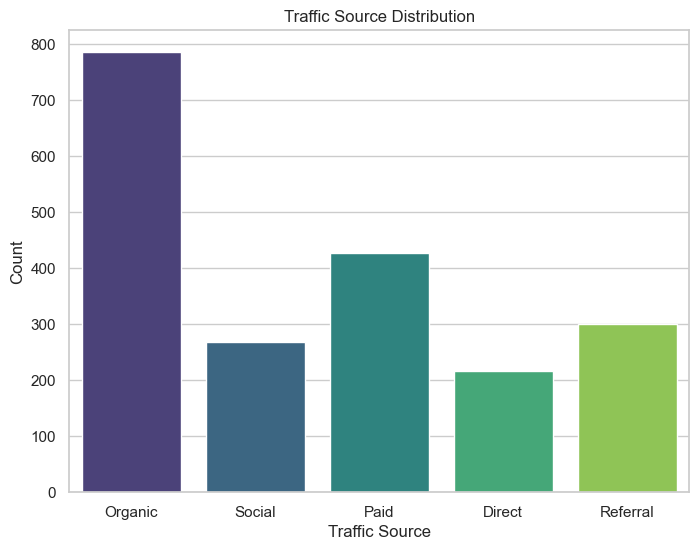

In [34]:
# 5. Traffic Source Distribution (Categorical Data Visualization)
plt.figure(figsize=(8, 6))
sns.countplot(x="Traffic Source", data=data, palette="viridis")
plt.title("Traffic Source Distribution")
plt.ylabel("Count")
plt.show()

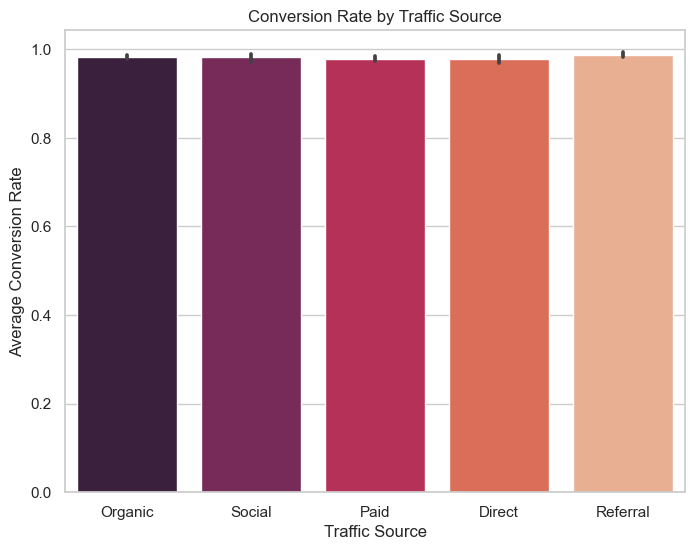

In [35]:
# 6. Conversion Rate by Traffic Source
plt.figure(figsize=(8, 6))
sns.barplot(x="Traffic Source", y="Conversion Rate", data=data, palette="rocket")
plt.title("Conversion Rate by Traffic Source")
plt.ylabel("Average Conversion Rate")
plt.show()

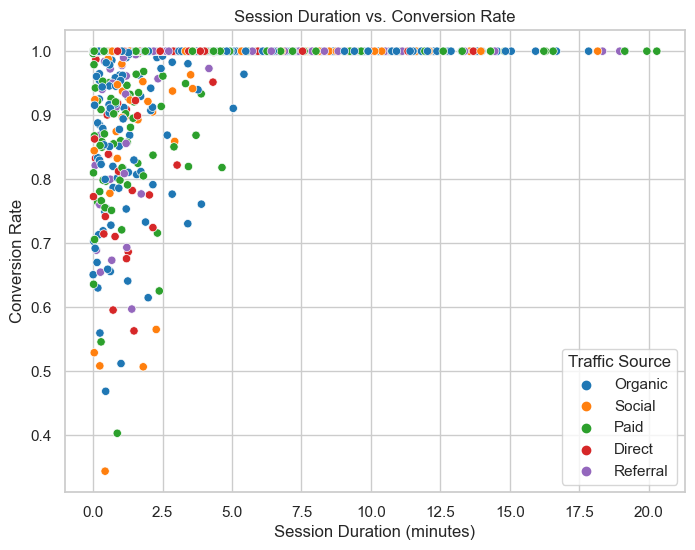

In [36]:
# 7. Session Duration vs. Conversion Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Session Duration', y='Conversion Rate', data=data, hue="Traffic Source", palette="tab10")
plt.title("Session Duration vs. Conversion Rate")
plt.xlabel("Session Duration (minutes)")
plt.ylabel("Conversion Rate")
plt.show()

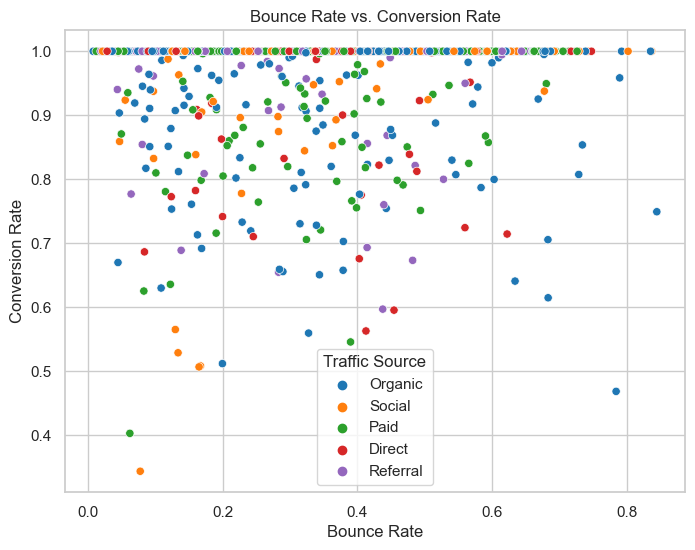

In [37]:
# 8. Bounce Rate vs. Conversion Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bounce Rate', y='Conversion Rate', data=data, hue="Traffic Source", palette="tab10")
plt.title("Bounce Rate vs. Conversion Rate")
plt.xlabel("Bounce Rate")
plt.ylabel("Conversion Rate")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

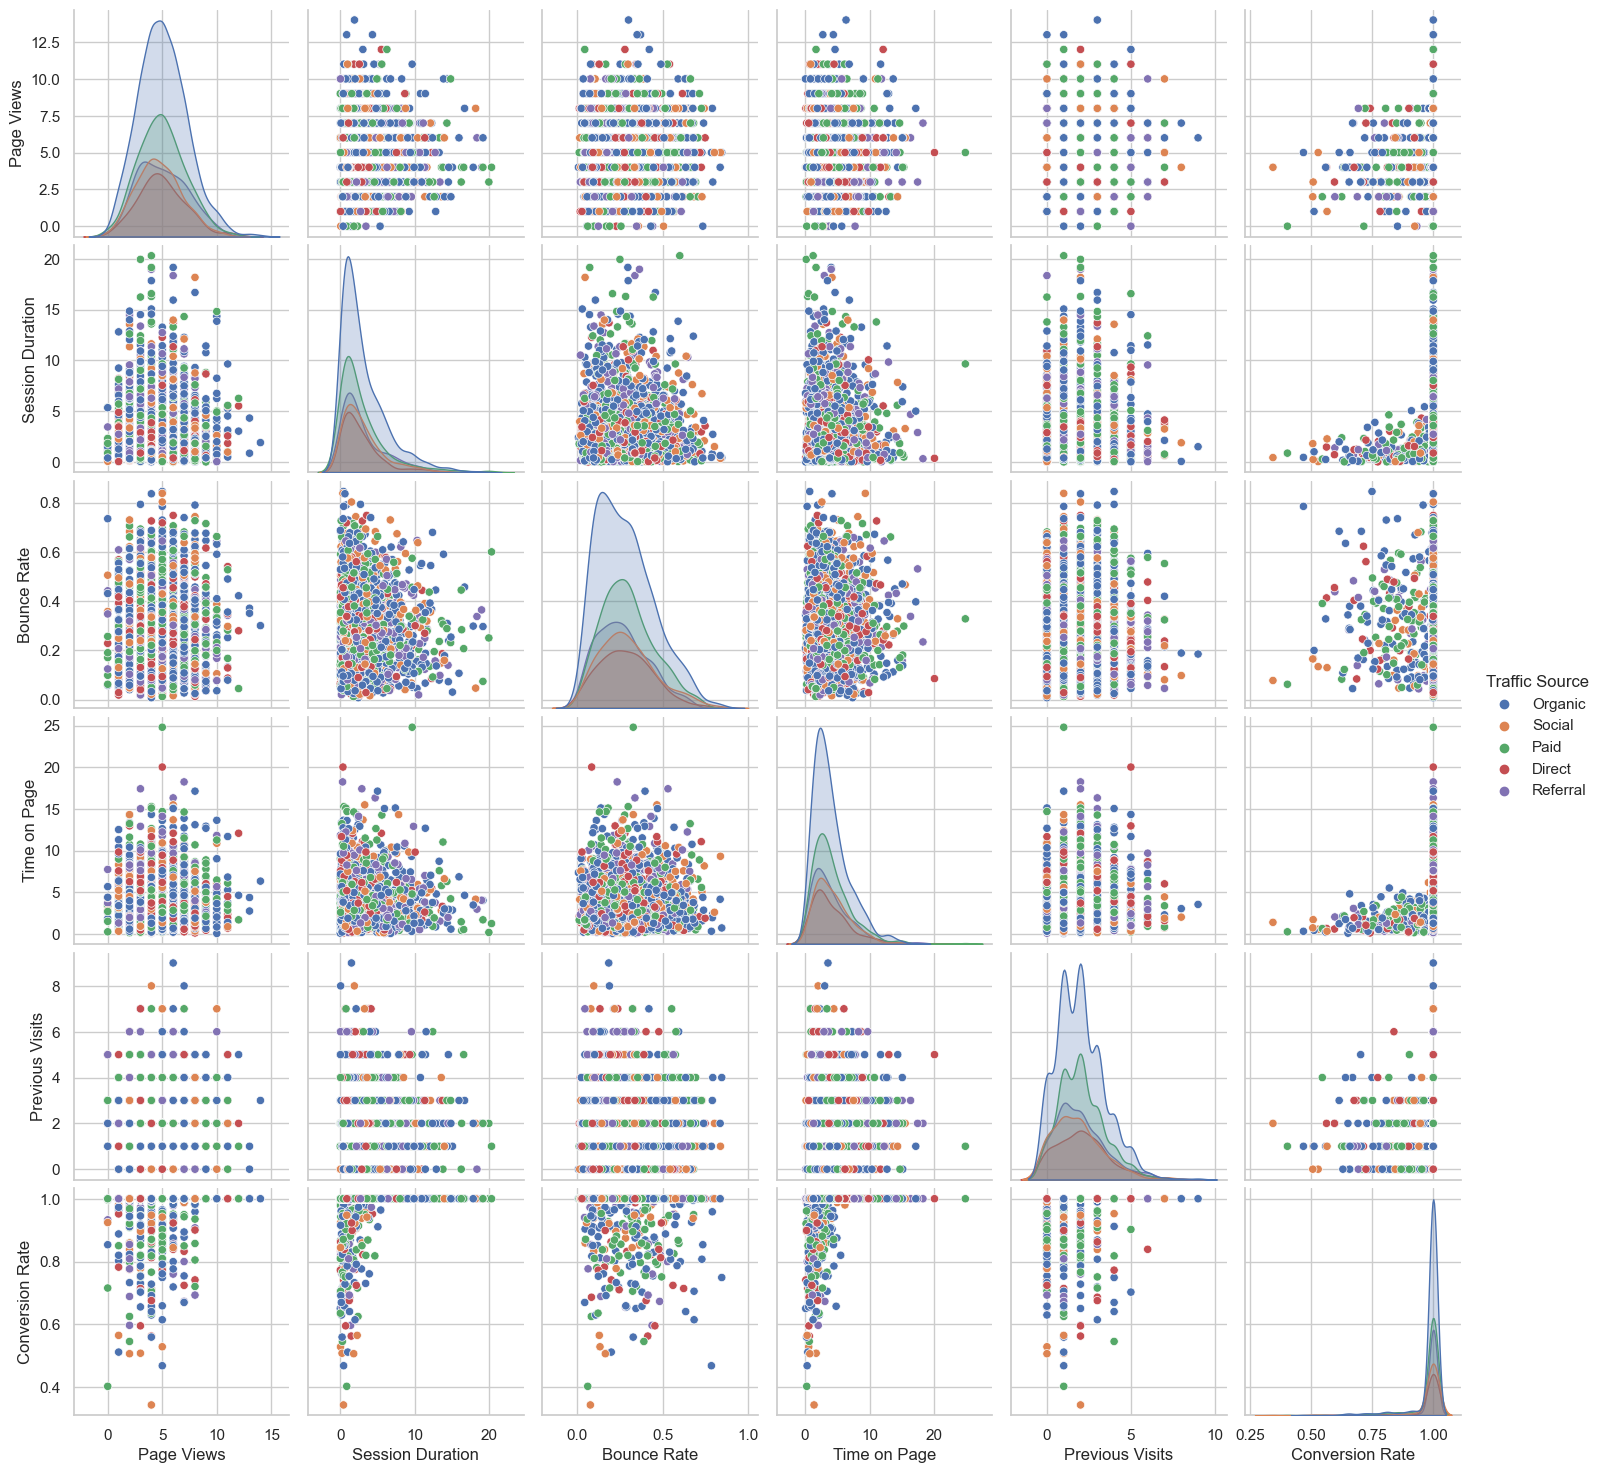

In [38]:
# 9. Pairwise relationships including categorical data (Traffic Source)
sns.pairplot(data, hue="Traffic Source", vars=['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate'])
plt.show()

## 3. User Behavior Analysis
We will analyze user behavior by looking at key features such as session duration, bounce rate, and pages viewed per session.

In [22]:
# Average Session Duration
average_session_duration = data['Session Duration'].mean()
print(f'Average Session Duration: {average_session_duration:.2f} minutes')

# Bounce Rate Analysis
bounce_rate = data['Bounce Rate'].mean()
print(f'Average Bounce Rate: {bounce_rate:.2f}')

# Average Page Views per Session
average_page_views = data['Page Views'].mean()
print(f'Average Page Views per Session: {average_page_views:.2f}')

Average Session Duration: 3.02 minutes
Average Bounce Rate: 0.28
Average Page Views per Session: 4.95


## 4. Traffic Sources Analysis
Analyzing traffic sources can provide insights into where your visitors are coming from.

Traffic Source Distribution:
Traffic Source
Organic     786
Paid        428
Referral    301
Social      269
Direct      216
Name: count, dtype: int64


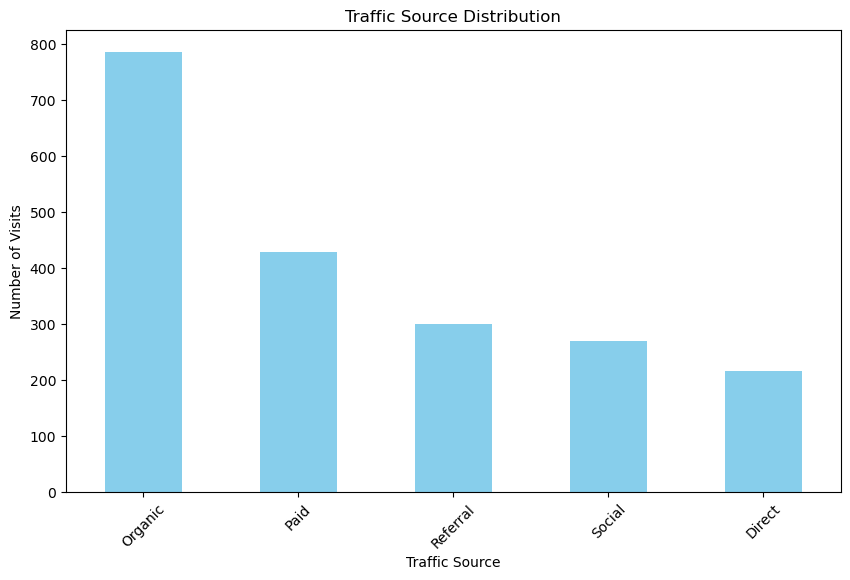

In [23]:
# Traffic Source Distribution
traffic_source_distribution = data['Traffic Source'].value_counts()
print("Traffic Source Distribution:")
print(traffic_source_distribution)

# Visualization of Traffic Sources
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
traffic_source_distribution.plot(kind='bar', color='skyblue')
plt.title('Traffic Source Distribution')
plt.xlabel('Traffic Source')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45)
plt.show()

## 5. Conversion Analysis
Understanding conversion rates and previous visits can help evaluate website effectiveness.

In [24]:
# Average Conversion Rate
conversion_rate = data['Conversion Rate'].mean()
print(f'Average Conversion Rate: {conversion_rate:.2f}')

# Previous Visits Analysis
previous_visits_average = data['Previous Visits'].mean()
print(f'Average Previous Visits: {previous_visits_average:.2f}')

Average Conversion Rate: 0.98
Average Previous Visits: 1.98


## 6. Data Visualization
Visualizing session duration, bounce rates, and conversions can provide further insights.

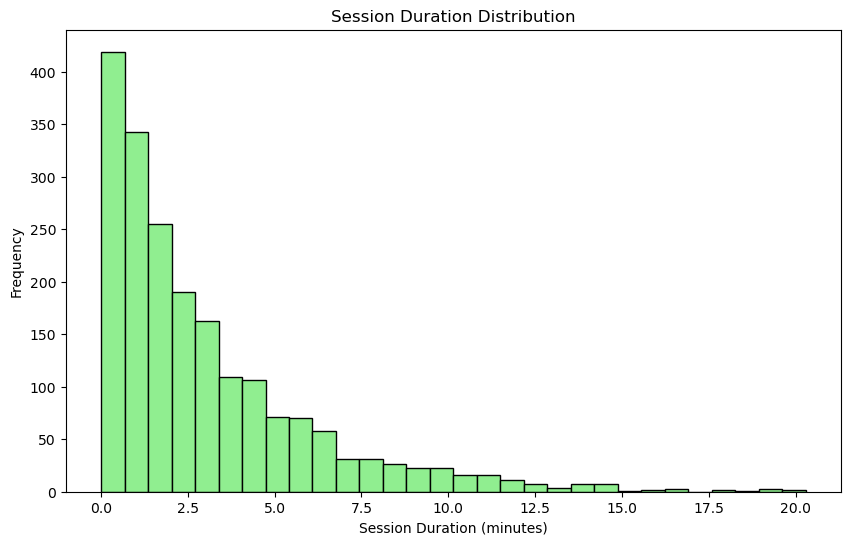

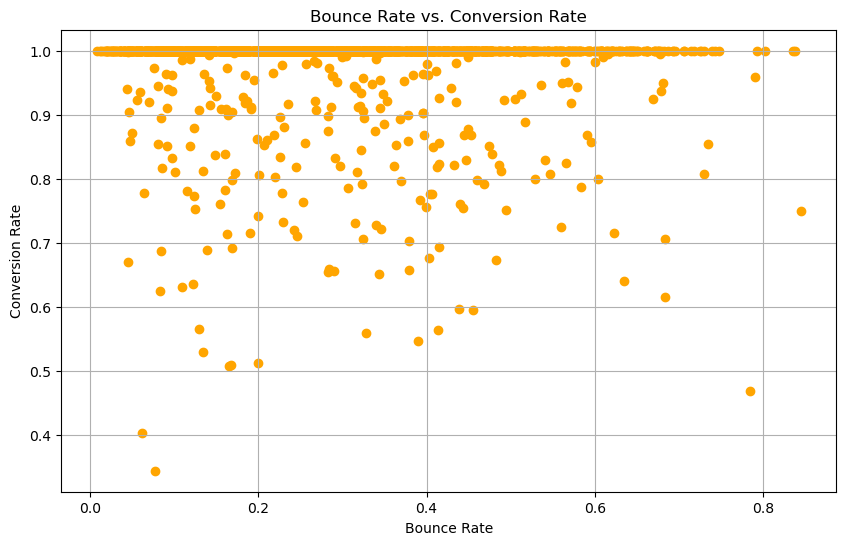

In [25]:
# Session Duration Distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Session Duration'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Bounce Rate vs. Conversion Rate
plt.figure(figsize=(10, 6))
plt.scatter(data['Bounce Rate'], data['Conversion Rate'], color='orange')
plt.title('Bounce Rate vs. Conversion Rate')
plt.xlabel('Bounce Rate')
plt.ylabel('Conversion Rate')
plt.grid(True)
plt.show()

## 7. Statistical Analysis
We can conduct correlation analysis to see how different metrics are related.

### a. Correlation Matrix for Numerical Features

Numerical Columns: ['Page Views', 'Session Duration', 'Bounce Rate', 'Time on Page', 'Previous Visits', 'Conversion Rate']
Correlation Matrix:
                  Page Views  Session Duration  Bounce Rate  Time on Page  \
Page Views          1.000000         -0.012788     0.030223      0.023941   
Session Duration   -0.012788          1.000000    -0.015931     -0.013985   
Bounce Rate         0.030223         -0.015931     1.000000      0.039340   
Time on Page        0.023941         -0.013985     0.039340      1.000000   
Previous Visits     0.028595         -0.025534    -0.015860     -0.028729   
Conversion Rate     0.126635          0.177798    -0.049051      0.229669   

                  Previous Visits  Conversion Rate  
Page Views               0.028595         0.126635  
Session Duration        -0.025534         0.177798  
Bounce Rate             -0.015860        -0.049051  
Time on Page            -0.028729         0.229669  
Previous Visits          1.000000         0.109496  

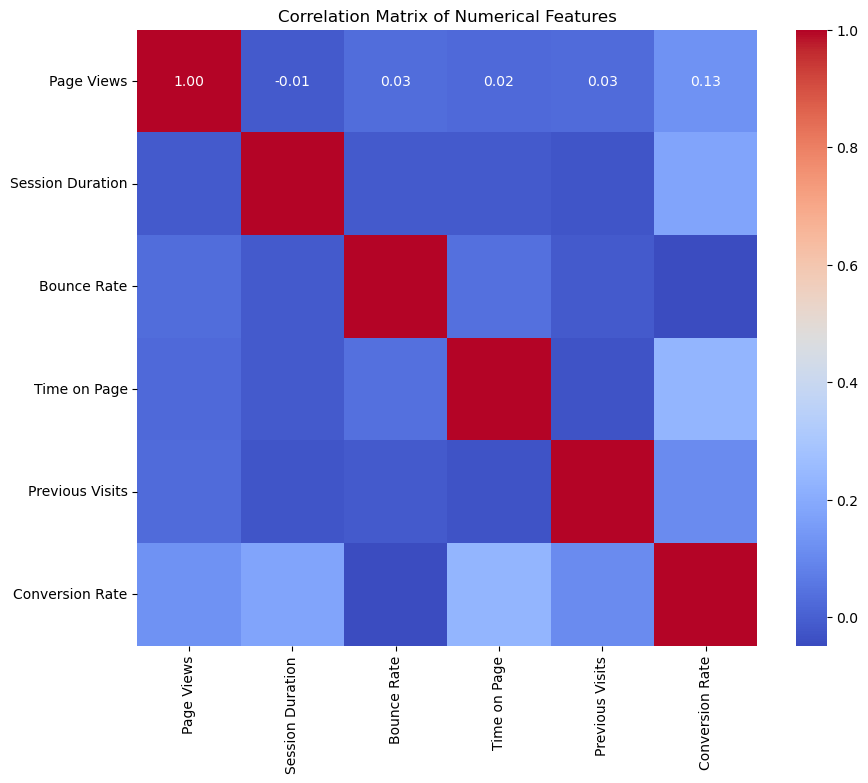

In [27]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:", numerical_cols.tolist())

# Compute correlation matrix for numerical columns
correlation_matrix = data[numerical_cols].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Visualization of Correlation Matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### b. Correlation Matrix Including Encoded Categorical Features

In [28]:
# One-Hot Encoding for 'Traffic Source'
data_encoded = pd.get_dummies(data, columns=['Traffic Source'], drop_first=True)

# Display the first few rows to verify
data_encoded.head()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate,Traffic Source_Organic,Traffic Source_Paid,Traffic Source_Referral,Traffic Source_Social
0,5,11.051381,0.230652,3.890460,3,1.0,True,False,False,False
1,4,3.429316,0.391001,8.478174,0,1.0,False,False,False,True
2,4,1.621052,0.397986,9.636170,2,1.0,True,False,False,False
3,5,3.629279,0.180458,2.071925,3,1.0,True,False,False,False
4,5,4.235843,0.291541,1.960654,5,1.0,False,True,False,False


Correlation Matrix with Encoded Variables:
                  Page Views  Session Duration  Bounce Rate  Time on Page  \
Page Views          1.000000         -0.012788     0.030223      0.023941   
Session Duration   -0.012788          1.000000    -0.015931     -0.013985   
Bounce Rate         0.030223         -0.015931     1.000000      0.039340   
Time on Page        0.023941         -0.013985     0.039340      1.000000   
Previous Visits     0.028595         -0.025534    -0.015860     -0.028729   
Conversion Rate     0.126635          0.177798    -0.049051      0.229669   

                  Previous Visits  Conversion Rate  
Page Views               0.028595         0.126635  
Session Duration        -0.025534         0.177798  
Bounce Rate             -0.015860        -0.049051  
Time on Page            -0.028729         0.229669  
Previous Visits          1.000000         0.109496  
Conversion Rate          0.109496         1.000000  


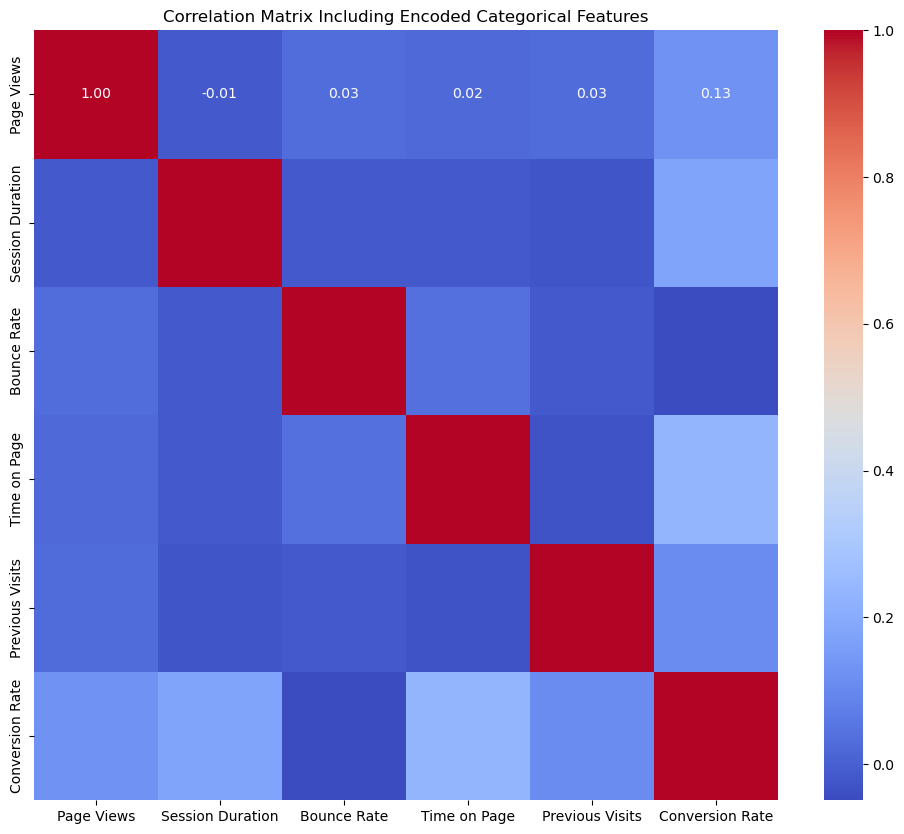

In [29]:
# Identify numerical columns including the encoded ones
numerical_cols_encoded = data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
correlation_matrix_encoded = data_encoded[numerical_cols_encoded].corr()
print("Correlation Matrix with Encoded Variables:")
print(correlation_matrix_encoded)

# Visualization of Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including Encoded Categorical Features')
plt.show()